In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def energy(S,J):
    #input: a config S , interaction strength J
    #Ouput: an energy Es
    
    #compute the energy Es of the configuration S with respect the Ising hamiltonian and periodic bound condition 
    Es = 0
    L = np.shape(S)[0]
    for i in range(L):
        Es += sum(S[i,:]*S[i-1,:]+S[i,:]*S[(i+1)%L,:]+S[:,i]*S[:,i-1]+S[:,i]*S[:,(i+1)%L])
    Es = -J*Es/2 #each couple was counted 2 times
    return Es


In [5]:
def diffE_flip(S_old,idx,J):
    #input: a config S_old ,index idx, interaction strength J
    #Ouput: the flipped config S_new from S_old at the index idx,
    #       the gap energy dE between the energies of the config S_new and S_old
    
    #I will use dE for the MCMC accept part (less computations) 
    i,j = idx[0],idx[1]
    L = np.shape(S_old)[0]
    dE = 2*J*S_old[i,j]*(S_old[i-1,j]+S_old[(i+1)%L,j]+S_old[i,j-1]+S_old[i,(j+1)%L])
    #here dE = Enew-Eold were Enew is the energy of the  flipped config S
    #energy expression depends only on the idx index term of the sum and due to the flip, the term contribute 2 times
    S_new =S_old.copy()
    S_new[i,j] = -S_old[i,j]
    return S_new,dE

In [6]:
def accept(S_new,S_old,dE,E_old,beta):
    #input: S_new the flipped config, S_old the intitial configs,
    #       dE the gap energy between the two configs, E_old the energy of S_old, beta the inverse temperature
    #Output : a config S and its corresponding energy E accepted by the rule 
    
    
    p = np.exp(-dE*beta)  #dE = E_new-E_old
    x = np.random.uniform(0,1)
    test = min(1,p)
    if x<test: #if x<= test:
        E_new = E_old+dE
        return S_new,E_new#,True #True/False  was used to try to debug the first version of Measurement
    return S_old,E_old#,False
 

In [7]:
L = 3
J = 1
T = 1
beta = 1/T
L = 40
#little test
for i in range(10**3):
    S_old = 2*np.random.randint(-1, high=1, size=(L,L))+1
    idx= np.random.randint(0, high=L, size=2)
    S_new,dE = diffE_flip(S_old,idx,J)
    Enew=energy(S_new,J)
    Eold =energy(S_old,J)
    if dE !=Enew-Eold :
        print (Enew,Eold,dE) #dE = E_new-E_old

In [8]:
def Measurement(S,J,beta,N_mc):
    #Input: an initial config S, interaction strength J, inverse temperature beta, numbers of sample N_mc
    #Output: Chain_S, Chain_E measures from the config and energy trajectory after the thermalization built by MCMC 
    
    
    L = np.shape(S)[0]
    Es = energy(S,J)
    thermalization_time=10*L*L
    corr_time=L*L
    Si = S.copy()
    Ei = Es
    #accepted_rejected=0
    
    #burn-in , thermalization
    for i in range(thermalization_time):
        idx = np.random.randint(0, high=L, size=2)
        S_old = Si.copy()
        E_old = Ei
        S_new,dE = diffE_flip(S_old,idx,J)
        #Si,Ei,accepted_rejeted = accept(S_new,S_old,dE,E_old,beta)
        Si,Ei = accept(S_new,S_old,dE,E_old,beta)
    
    
    #start the measures
    Chain_S = [Si]
    Chain_E = [Ei]
    for k in range(N_mc-1):
        for i in range(corr_time):
            idx = np.random.randint(0, high=L, size=2)
            S_old = Si.copy()
            E_old = Ei
            S_new,dE = diffE_flip(S_old,idx,J)
            #Si,Ei,accepted_rejected = accept(S_new,S_old,dE,E_old,beta)
            Si,Ei = accept(S_new,S_old,dE,E_old,beta)
        Chain_S += [Si]
        Chain_E += [Ei]
        
    return Chain_S,Chain_E

In [155]:
# data generation example
L = 40
J = 1
T = 2
N_mc = 10**3
beta = 1/T
S_in = 2*np.random.randint(-1, high=1, size=(L,L))+1
Chain_Stest1,Chain_Etest1 = Measurement(S_in,J,beta,N_mc)

In [158]:
C11 = np.load('C1_1.npy')
C12 = np.load('C1_2.npy')
C13 = np.load('C1_3.npy')
C151 = np.load('C15_1.npy')
C152 = np.load('C15_2.npy')
C153 = np.load('C15_3.npy')
C151 = np.load('C15_1.npy')
C152 = np.load('C15_2.npy')
C21 = np.load('C2_1.npy')
C22 = np.load('C2_2.npy')
C23 = np.load('C2_3.npy')
C251 = np.load('C25_1.npy')
C252 = np.load('C25_2.npy')
C31 = np.load('C3_1.npy')
C32 = np.load('C3_2.npy')
C351 = np.load('C35_1.npy')
C352 = np.load('C35_2.npy')
C41 = np.load('C4_1.npy')
C42 = np.load('C4_2.npy')

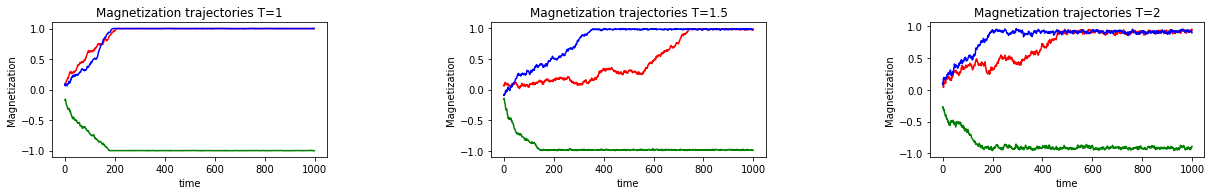

In [159]:
#plots T=1,1.5,2

Mag11 = [(np.mean(S)) for S in C11]
Mag12 = [(np.mean(S)) for S in C12]
Mag13 = [(np.mean(S)) for S in C13]

Mag151 = [(np.mean(S)) for S in C151]
Mag152 = [(np.mean(S)) for S in C152]
Mag153 = [(np.mean(S)) for S in C153]

Mag21 = [(np.mean(S)) for S in C21]
Mag22 = [(np.mean(S)) for S in C22]
Mag23 = [(np.mean(S)) for S in C23]

time = np.arange(1000)

figure = plt.figure(figsize = (20, 7))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace =0.6, hspace = 1)
axes = figure.add_subplot(2, 3, 1)
axes.set_xlabel('time')
axes.set_ylabel('Magnetization')
axes.set_title('Magnetization trajectories T=1')
axes.plot(time,Mag11,'r',time,Mag12,'b',time,Mag13,'g')

axes = figure.add_subplot(2, 3, 2)
axes.set_xlabel('time')
axes.set_ylabel('Magnetization')
axes.set_title('Magnetization trajectories T=1.5')
axes.plot(time,Mag151,'r',time,Mag152,'b',time,Mag153,'g')

axes = figure.add_subplot(2, 3, 3)
axes.set_xlabel('time')
axes.set_ylabel('Magnetization')
axes.set_title('Magnetization trajectories T=2')
axes.plot(time,Mag21,'r',time,Mag22,'b',time,Mag23,'g')

plt.show()

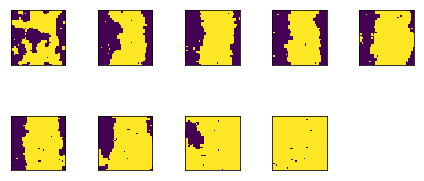

In [196]:
# T = 1.5
figure = plt.figure(figsize = (7, 7))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.5, wspace =0.6, hspace = 0.1)

for i in range(9):
    axes = figure.add_subplot(2, 5, i+1)
    axes.imshow(C151[i*100])
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
plt.show()

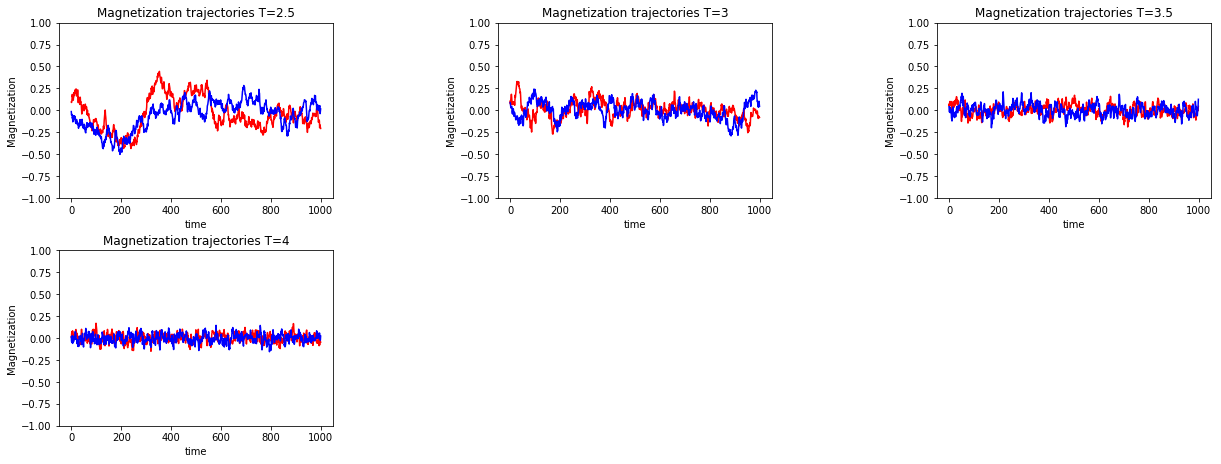

In [83]:
#plot T = 2.5 until 4

Mag251 = [(np.mean(S)) for S in C251]
Mag252 = [(np.mean(S)) for S in C252]

Mag31 = [(np.mean(S)) for S in C31]
Mag32 = [(np.mean(S)) for S in C32]

Mag351 = [(np.mean(S)) for S in C351]
Mag352 = [(np.mean(S)) for S in C352]

Mag41 = [(np.mean(S)) for S in C41]
Mag42 = [(np.mean(S)) for S in C42]


time = np.arange(1000)

figure = plt.figure(figsize = (20, 7))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace =0.6, hspace = 0.3)


axes = figure.add_subplot(2, 3, 1)
axes.set_xlabel('time')
axes.set_ylabel('Magnetization')
axes.set_ylim(-1,1)
axes.set_title('Magnetization trajectories T=2.5')
axes.plot(time,Mag251,'r',time,Mag252,'b')

axes = figure.add_subplot(2, 3, 2)
axes.set_xlabel('time')
axes.set_ylabel('Magnetization')
axes.set_ylim(-1,1)
axes.set_title('Magnetization trajectories T=3')
axes.plot(time,Mag31,'r',time,Mag32,'b')

axes = figure.add_subplot(2, 3, 3)
axes.set_xlabel('time')
axes.set_ylabel('Magnetization')
axes.set_ylim(-1,1)
axes.set_title('Magnetization trajectories T=3.5')
axes.plot(time,Mag351,'r',time,Mag352,'b')

axes = figure.add_subplot(2, 3, 4)
axes.set_xlabel('time')
axes.set_ylabel('Magnetization')
axes.set_ylim(-1,1)
axes.set_title('Magnetization trajectories T=4')
axes.plot(time,Mag41,'r',time,Mag42,'b')

plt.show()


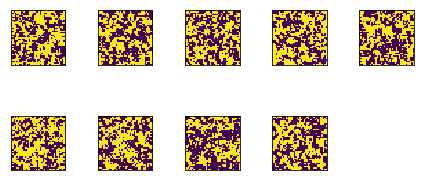

In [197]:
# T = 3.5
figure = plt.figure(figsize = (7, 7))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.5, wspace =0.6, hspace = 0.1)

for i in range(9):
    axes = figure.add_subplot(2, 5, i+1)
    axes.imshow(C351[i*100])
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
plt.show()

In [163]:
#plots average M and energies

Mabs1 = [abs(x) for x in Mag11]
E1 = [energy(S,J)/40**2 for S in C11]
Mabs15 = [abs(x) for x in Mag152]
E15 = [energy(S,J)/40**2 for S in C152]
Mabs2 = [abs(x) for x in Mag21]
E2 = [energy(S,J)/40**2 for S in C21]
Mabs25 = [abs(x) for x in Mag251]
E25 = [energy(S,J)/40**2 for S in C252]
Mabs3 = [abs(x) for x in Mag31]
E3 = [energy(S,J)/40**2 for S in C31]
Mabs35 = [abs(x) for x in Mag351]
E35 = [energy(S,J)/40**2 for S in C351]
Mabs4 = [abs(x) for x in Mag41]
E4 = [energy(S,J)/40**2 for S in C41]

MM1,VM1 = np.mean(Mabs1),np.std(Mabs1)
MH1,VH1 = np.mean(E1),np.std(E1) 
MM15,VM15 = np.mean(Mabs15),np.std(Mabs15)
MH15,VH15 = np.mean(E15),np.std(E15)
MM2,VM2 = np.mean(Mabs2),np.std(Mabs2)
MH2,VH2 = np.mean(E2),np.std(E2)
MM25,VM25 = np.mean(Mabs25),np.std(Mabs25)
MH25,VH25 = np.mean(E25),np.std(E25)
MM3,VM3 = np.mean(Mabs3),np.std(Mabs3)
MH3,VH3 = np.mean(E3),np.std(E3)
MM35,VM35 = np.mean(Mabs35),np.std(Mabs35)
MH35,VH35 = np.mean(E35),np.std(E35)
MM4,VM4 = np.mean(Mabs4),np.std(Mabs4)
MH4,VH4 = np.mean(E4),np.std(E4)




M = [MM1,MM15,MM2,MM25,MM3,MM35,MM4]
s = 1/np.sqrt(1000)

ICM = [1.96*s*VM1,s*1.96*VM15,s*1.96*VM2,s*1.96*VM25,s*1.96*VM3,s*1.96*VM35,s*1.96*VM4]
H = [MH1,MH15,MH2,MH25,MH3,MH35,MH4]
ICH = [s*1.96*VH1,s*1.96*VH15,s*1.96*VH2,s*1.96*VH25,s*1.96*VH3,s*1.96*VH35,s*1.96*VH4]



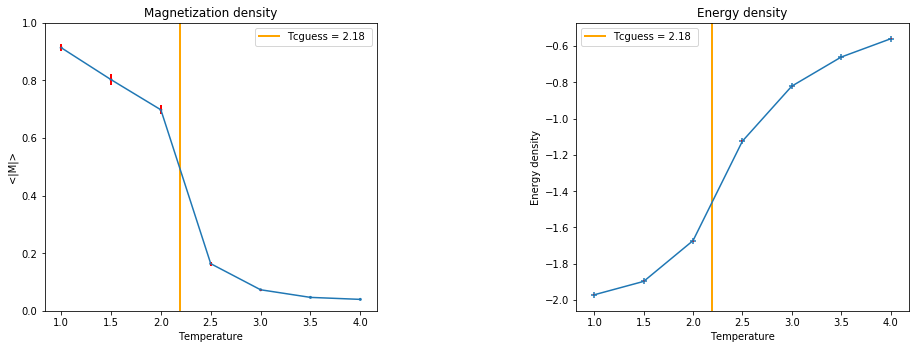

In [173]:
figure = plt.figure(figsize = (15, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1,
                       right = 0.9, top = 0.9, wspace =0.6, hspace = 0.3)
T = np.linspace(1,4,7)

def interpol(x):
    return MM2+(x-2)*2*(MM25-MM2)
xabs = np.linspace(2,2.5,100)
yim = interpol(xabs)
Tcguess = xabs[np.argmin((yim-0.5)**2)]

axes = figure.add_subplot(1,2 , 1)
axes.set_xlabel('Temperature')
axes.set_ylabel('<|M|>')
axes.set_ylim(0,1)
axes.axvline(Tcguess,color="orange",linewidth=2.0,label = 'Tcguess = 2.18 ')
axes.set_title('Magnetization density')
axes.errorbar(T,M,ICM,ecolor = 'red', elinewidth = 2, capthick = 8)
axes.scatter(T,M,marker = '.',edgecolor = 'none')
axes.legend()

axes = figure.add_subplot(1,2 , 2)
axes.set_xlabel('Temperature')
axes.set_ylabel('Energy density')
axes.axvline(Tcguess,color="orange",linewidth=2.0, label = 'Tcguess = 2.18 ')
axes.set_title('Energy density')
axes.errorbar(T,H,ICH,ecolor = 'red', elinewidth = 2, capthick = 8)
axes.scatter(T,H,marker = '+',edgecolor = 'none')
axes.legend()
plt.show()